In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
from sklearn.preprocessing import StandardScaler
from numpy.linalg import svd

In [2]:
# number of scheduling variables
n = 1

In [3]:
X = np.load('Xdata.npy')
x1 = X[:,0]
x2 = X[:,1]
x3 = X[:,2]
x4 = X[:,3]

In [4]:
T = 0.05
g = 9.8
m = 0.22
M = 1.3282
f0 = 22.915
f1 = 0.007056
l = 0.304
J = 0.004963

In [5]:
r1 = 1 / ((M + m)*(J + m * l * l) - (m ** 2) * ( l ** 2) * ( np.cos(x1) ** 2))
r2 = np.sin(x1) / (x1 * ((M + m)*(J + m * l * l) - (m ** 2) * ( l ** 2) * ( np.cos(x1) ** 2)))
r3 = np.cos(x1) / ((M + m)*(J + m * l * l) - (m ** 2) * ( l ** 2) * ( np.cos(x1) ** 2))
r4 = np.sin(x1) * np.cos(x1) / (x1 * ((M + m)*(J + m * l * l) - (m ** 2) * ( l ** 2) * ( np.cos(x1) ** 2)))
r5 = x2 ** 2

In [6]:
Data = np.array([r1, r2, r3, r4, r5])

In [7]:
scaler = StandardScaler()
Dat_sca = scaler.fit_transform(Data.T)
Dat_sca = Dat_sca.T

In [8]:
U, S, VH = svd(Dat_sca, full_matrices=False)

In [9]:
S

array([2.87865632e+03, 1.26953332e+03, 4.02852262e+01, 2.20933804e-01,
       8.89070108e-04])

## Apply the method on a special trajectory

In [10]:
Xfig = np.load('Xfig.npy')
Ufig = np.load('Ufig.npy')

x1_t = Xfig[:,0]
x2_t = Xfig[:,1]
x3_t = Xfig[:,2]
x4_t = Xfig[:,3]
u_t = Ufig[:,0]

r1_fig = 1 / ((M + m)*(J + m * l * l) - (m ** 2) * ( l ** 2) * ( np.cos(x1_t) ** 2))
r2_fig = np.sin(x1_t) / (x1_t * ((M + m)*(J + m * l * l) - (m ** 2) * ( l ** 2) * ( np.cos(x1_t) ** 2)))
r3_fig = np.cos(x1_t) / ((M + m)*(J + m * l * l) - (m ** 2) * ( l ** 2) * ( np.cos(x1_t) ** 2))
r4_fig = np.sin(x1_t) * np.cos(x1_t) / (x1_t * ((M + m)*(J + m * l * l) - (m ** 2) * ( l ** 2) * ( np.cos(x1_t) ** 2)))
r5_fig = x2_t ** 2

dat_fig = np.array([r1_fig, r2_fig, r3_fig, r4_fig, r5_fig])
data_fig_sca = scaler.transform(dat_fig.T)
data_fig_sca = data_fig_sca.T

In [11]:
Data_aprox =scaler.inverse_transform( (np.matmul(U[:,:n],U[:,:n].T).dot(data_fig_sca)).T )
Data_aprox = Data_aprox.T

In [12]:
r1_aprox = Data_aprox[0, :]
r2_aprox = Data_aprox[1, :]
r3_aprox = Data_aprox[2, :]
r4_aprox = Data_aprox[3, :]
r5_aprox = Data_aprox[4, :]

sch = U[:,:n].T.dot(data_fig_sca)

In [13]:
c1 = T * m * g * l * (M + m)
c2 = - T * (m ** 2) * (l ** 2)
c3 = - T * f1 * (M + m)
c4 = T * f0 * m * l
c5 = - T * (m ** 2) * g * (l ** 2)
c6 = T * m * l * (J + m * l * l)
c7 = T * f1 * m * l
c8 = -T * f0 * (J + m * l * l)
c9 = -T * m * l
c10 = T * ( J + m * l * l)

In [14]:
x1_aprox = x1_t + T * x2_t
x2_aprox = (c1 * r2_aprox + c2 * r4_aprox * r5_aprox) * x1_t + (1+ c3 * r1_aprox) * x2_t + c4 * r3_aprox * x4_t + c9 * r3_aprox * u_t
x3_aprox = x3_t + T * x4_t
x4_aprox = (c5 * r4_aprox + c6 * r2_aprox * r5_aprox) * x1_t + c7 * r3_aprox * x2_t + (1 + c8 * r1_aprox) * x4_t + c10 * r1_aprox * u_t

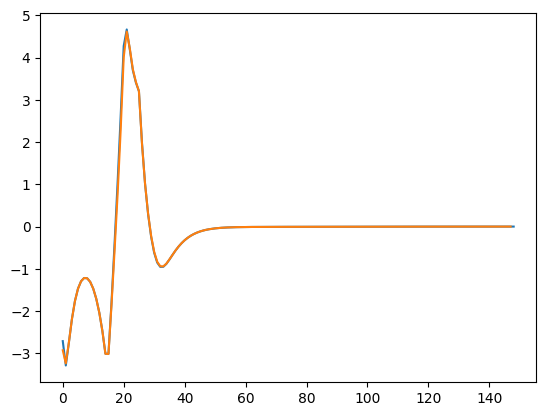

In [15]:
plt.plot(x2_aprox)
plt.plot(x2_t[1:])
plt.show()

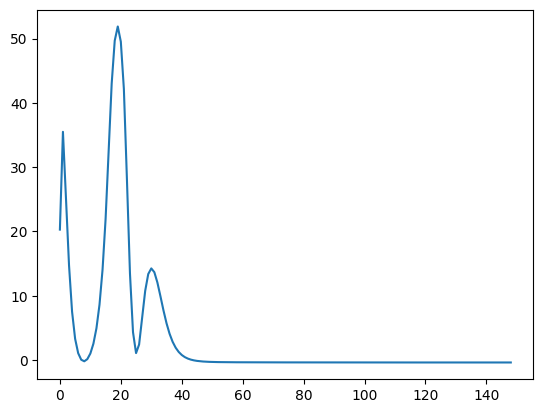

In [16]:
plt.plot(sch[0,:])
plt.show()